In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
toxic_train = pd.read_csv('train.csv')
toxic_test = pd.read_csv('test.csv')

In [3]:
toxic_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
tokenizer = Tokenizer(num_words=20000)

In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = toxic_train[list_classes].values
list_sentences_train = toxic_train["comment_text"]
list_sentences_test = toxic_test["comment_text"]

In [7]:
tokenizer.fit_on_texts(list(list_sentences_train))

In [8]:
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [9]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

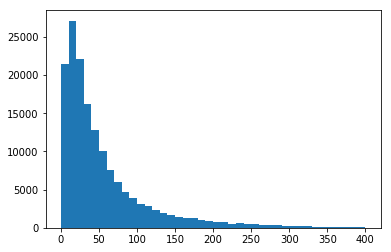

In [10]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [11]:
X_train = pad_sequences(list_tokenized_train,maxlen=200)
X_test = pad_sequences(list_tokenized_test,maxlen=200)

In [12]:
from keras.layers import Embedding,LSTM,GlobalMaxPool1D,Dense,Dropout,GRU
from keras.models import Sequential

In [13]:
model = Sequential()

In [14]:
model.add(Embedding(20000,128))

In [15]:
model.add(GRU(10,return_sequences=True,dropout=0.1))

In [16]:
model.add(GlobalMaxPool1D())

In [71]:
#model.add(LSTM(60,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))

In [17]:
model.add(Dense(10,activation='relu'))

In [18]:
model.add(Dense(6,activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y, epochs=5, batch_size=32, validation_split=0.3)
model.save_weights('pre_trained_glove_model.h5')

Train on 111699 samples, validate on 47872 samples
Epoch 1/5
111699/111699 [==============================] - 947s 8ms/step - loss: 0.0804 - acc: 0.9721 - val_loss: 0.0559 - val_acc: 0.9811
Epoch 2/5
111699/111699 [==============================] - 836s 7ms/step - loss: 0.0532 - acc: 0.9815 - val_loss: 0.0537 - val_acc: 0.9812
Epoch 3/5
111699/111699 [==============================] - 706s 6ms/step - loss: 0.0510 - acc: 0.9820 - val_loss: 0.0524 - val_acc: 0.9817
Epoch 4/5
111699/111699 [==============================] - 705s 6ms/step - loss: 0.0500 - acc: 0.9826 - val_loss: 0.0524 - val_acc: 0.9818
Epoch 5/5
111699/111699 [==============================] - 703s 6ms/step - loss: 0.0492 - acc: 0.9827 - val_loss: 0.0528 - val_acc: 0.9819


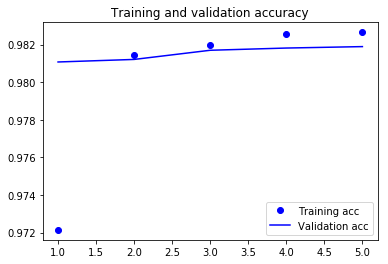

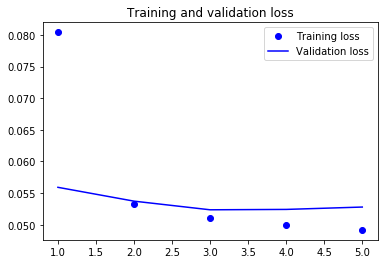

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predictions = model.predict_proba(X_test,batch_size=32)

In [22]:
predictions.reshape([153164,6])

array([[  9.92275298e-01,   4.13958788e-01,   9.53959346e-01,
          4.72863913e-02,   9.24071252e-01,   2.56432742e-01],
       [  2.89562973e-03,   9.58798374e-09,   9.92441055e-05,
          3.93693000e-07,   1.00641904e-04,   5.66811968e-06],
       [  4.91218409e-03,   2.51063046e-08,   1.59091098e-04,
          4.80491337e-07,   1.04482984e-04,   2.88794377e-06],
       ..., 
       [  3.30925663e-03,   2.86497071e-09,   2.03273419e-04,
          6.75557175e-08,   1.42072953e-04,   5.80798178e-06],
       [  2.58964766e-03,   1.34489420e-09,   1.58137234e-04,
          3.27891634e-08,   9.07295180e-05,   3.64847938e-06],
       [  9.45574880e-01,   7.34138396e-03,   8.66958857e-01,
          2.65932700e-04,   2.46328712e-01,   2.39624176e-03]], dtype=float32)

In [23]:
predictions.shape

(153164, 6)

In [24]:
df1 = pd.DataFrame(predictions[:,0],columns={'toxic'})
df2 = pd.DataFrame(predictions[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(predictions[:,2],columns={'obscene'})
df4 = pd.DataFrame(predictions[:,3],columns={'threat'})
df5 = pd.DataFrame(predictions[:,4],columns={'insult'})
df6 = pd.DataFrame(predictions[:,5],columns={'identity_hate'})

In [25]:
df7 = pd.concat([toxic_test['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [26]:
df7.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.992275,4.139588e-01,0.953959,4.728639e-02,0.924071,0.256433
1,0000247867823ef7,0.002896,9.587984e-09,0.000099,3.936930e-07,0.000101,0.000006
2,00013b17ad220c46,0.004912,2.510630e-08,0.000159,4.804913e-07,0.000104,0.000003
3,00017563c3f7919a,0.002774,1.446843e-09,0.000149,5.102059e-08,0.000107,0.000004
4,00017695ad8997eb,0.069572,1.688170e-05,0.008034,3.130733e-04,0.008496,0.001444


In [27]:
df7.set_index('id',inplace=True)

In [28]:
df7.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.992275,4.139588e-01,0.953959,4.728639e-02,0.924071,0.256433
0000247867823ef7,0.002896,9.587984e-09,0.000099,3.936930e-07,0.000101,0.000006
00013b17ad220c46,0.004912,2.510630e-08,0.000159,4.804913e-07,0.000104,0.000003
00017563c3f7919a,0.002774,1.446843e-09,0.000149,5.102059e-08,0.000107,0.000004
00017695ad8997eb,0.069572,1.688170e-05,0.008034,3.130733e-04,0.008496,0.001444


In [29]:
df7.shape

(153164, 6)

In [30]:
df7.to_csv(path_or_buf='submission2.csv')